In [7]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [8]:
#Create a set of random latitude and longitude combinations.

lats=np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs=np.random.uniform(low=-180.000, high=180.00, size=1500)

lat_lngs=zip(lats,lngs)

lat_lngs

In [9]:
#Addlatitudes and longitudes to a list.

coordinates=list(lat_lngs)

In [10]:
#Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-9.085158306059867 139.34101968603113
-25.743046050181107 129.09760278553512
68.22754166477978 136.55976808457916
-60.70418910231477 13.330861370057647
8.220980597684544 -38.21591892434745
32.94339074652615 43.96970600730131
-49.82954069634344 -7.88665235306982
69.69102707771876 -147.28004384788994
-39.658435722127514 -146.7882602481654
-40.607167898966985 172.23531396234256
-25.307790068096395 174.15048263403804
71.46840641945954 -94.15851070728337
81.34186057173 -21.488651464873243
2.8048319014073826 -1.8497679651278247
-8.488377198573332 167.74187134802412
74.65083117486432 -30.821577976771067
-58.6458369288043 127.2103974609173
69.44985871132204 -39.53452622242352
85.93077154400024 -53.65261439505372
48.54018702227239 -149.71722316779386
-23.32928417991853 -141.72293024385647
-24.458503451753757 68.95292743084252
65.9074268000195 57.40062912656933
73.1162606787428 32.08824205972209
-82.0823435250899 113.74862686763356
83.7365094128946 19.12311580851363
42.836676162194436 146.981448

31.3424763868191 32.60811265347931
49.9542031289856 -5.55591781384399
-69.8331281418338 -39.8220554965919
-48.967372196378946 12.128612939247546
-20.23262454079851 -86.74803527564384
86.52225738171617 -18.41260483353338
45.023848194766686 -142.74288302723673
-42.664583391725316 36.143654492729496
56.89227250784063 -150.83601625539777
54.47246445708305 165.24775583859275
7.090339109822807 137.08672116178172
-30.481904460645225 -147.40143982113852
-70.54725410032347 179.95301820436282
61.61959833458323 47.44491909574515
45.60283200364404 -35.87484970434784
-2.6739437666381036 110.97898595724081
-77.65445235941438 -79.87329082529213
-88.49884615382125 23.807030902023655
-36.05178818191266 -162.85429363037846
-68.39777581465651 83.74414085068645
33.395034173225724 -51.952618355364905
47.55235172750375 -171.65953101372625
-13.809498797182115 -81.09061230225859
-68.1642338935911 -115.18937771977313
-38.35604236087033 -176.00696561433733
31.504424597036703 -83.88227030472501
20.82624095561343

In [11]:
from citipy import citipy

In [12]:
#Create a list for holding the cities.

cities=[]

#Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, them we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
#Print the city count to confirm sufficient count.

len(cities)

581

In [13]:
#Import the time library and the datetime module from the datetime library

import time

from datetime import datetime

In [14]:
import requests

from config import weather_api_key

url="https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ weather_api_key

print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c9dbcf9ce214f4562b9ee232d17be3e6


In [15]:
#Create an empty list to hold the weather data.

city_data = []

#Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")


#Create counters.

record_count=1

set_count=1

#Loop thrrough allthe cities in our list.

for i, city in enumerate(cities): 
    
    #Group cities in seats of 50 for logging purposes.
    
    if (i % 50==0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
     #Create endpoint URL with each city.
        
    city_url=url + "&q=" + city.replace(" ", "+")
    
    
    #log th Url, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    
    record_count +=1
    
 #Run an API request for each of the cities.

    try:
        
        #Parse the JSON and retrieve data.
        
        city_weather=requests.get(city_url).json()
        
        #Parse out the needed data.
        
        city_lat=city_weather["coord"]["lat"]
        
        city_lng=city_weather["coord"]["lon"]
        
        city_max_temp=city_weather["main"]["temp_max"]
        
        city_humidity=city_weather["main"]["humidity"]
        
        city_clouds=city_weather["clouds"]["all"]
       
        city_wind=city_weather["wind"]["speed"]
        
        city_country=city_weather["sys"]["country"]
        
        #Convert the date to ISO standard.
        
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        #Append the city information into city_data list.
        
        city_data.append({"City":city.title(), "Lat":city_lat, "Lng":city_lng, "Max Temp":city_max_temp, "Humidity":city_humidity, "Cloudiness":city_clouds, "Wind Speed":city_wind, "Country":city_country, "Date":city_date})
        
        
        #If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping ...")
        
        pass
    
#Indicate that Data Loading is complete.

print("--------------------------------")

print("Data Retrieval Complete         ")

print("--------------------------------")
       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | merauke
Processing Record 2 of Set 1 | yulara
Processing Record 3 of Set 1 | batagay
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | itarema
Processing Record 6 of Set 1 | baghdad
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | takaka
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping ...
Processing Record 14 of Set 1 | takoradi
Processing Record 15 of Set 1 | lata
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22 of Set 1 | usinsk
Processing Record 23

Processing Record 38 of Set 4 | kamenka
Processing Record 39 of Set 4 | dingle
Processing Record 40 of Set 4 | sentyabrskiy
City not found. Skipping ...
Processing Record 41 of Set 4 | samusu
City not found. Skipping ...
Processing Record 42 of Set 4 | nhulunbuy
Processing Record 43 of Set 4 | tabuk
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | naze
Processing Record 47 of Set 4 | urdzhar
City not found. Skipping ...
Processing Record 48 of Set 4 | richards bay
Processing Record 49 of Set 4 | luanda
Processing Record 50 of Set 4 | phibun mangsahan
Processing Record 1 of Set 5 | kahului
Processing Record 2 of Set 5 | quatre cocos
Processing Record 3 of Set 5 | marsa matruh
Processing Record 4 of Set 5 | marystown
Processing Record 5 of Set 5 | stabroek
Processing Record 6 of Set 5 | fort saint john
City not found. Skipping ...
Processing Record 7 of Set 5 | road town
Processing Record 8 of Set 5 | vicuna
Processing Reco

Processing Record 27 of Set 8 | daxian
City not found. Skipping ...
Processing Record 28 of Set 8 | warqla
City not found. Skipping ...
Processing Record 29 of Set 8 | kupang
Processing Record 30 of Set 8 | zambezi
Processing Record 31 of Set 8 | chiang rai
Processing Record 32 of Set 8 | bowen
Processing Record 33 of Set 8 | porto torres
Processing Record 34 of Set 8 | barbar
City not found. Skipping ...
Processing Record 35 of Set 8 | lorena
Processing Record 36 of Set 8 | mocuba
Processing Record 37 of Set 8 | robertsport
Processing Record 38 of Set 8 | petrovac
Processing Record 39 of Set 8 | hastings
Processing Record 40 of Set 8 | shebunino
Processing Record 41 of Set 8 | svetlogorsk
Processing Record 42 of Set 8 | lufilufi
Processing Record 43 of Set 8 | san pelayo
Processing Record 44 of Set 8 | sindor
Processing Record 45 of Set 8 | acari
Processing Record 46 of Set 8 | wa
City not found. Skipping ...
Processing Record 47 of Set 8 | alta floresta
Processing Record 48 of Set 8 

Processing Record 14 of Set 12 | kismayo
Processing Record 15 of Set 12 | adrar
Processing Record 16 of Set 12 | isla mujeres
Processing Record 17 of Set 12 | beringovskiy
Processing Record 18 of Set 12 | vanderhoof
Processing Record 19 of Set 12 | chimoio
Processing Record 20 of Set 12 | tabiauea
City not found. Skipping ...
Processing Record 21 of Set 12 | constitucion
Processing Record 22 of Set 12 | touros
Processing Record 23 of Set 12 | krasnoselkup
Processing Record 24 of Set 12 | san-pedro
Processing Record 25 of Set 12 | saint-joseph
Processing Record 26 of Set 12 | grong
Processing Record 27 of Set 12 | kedrovyy
Processing Record 28 of Set 12 | wenling
Processing Record 29 of Set 12 | forestville
Processing Record 30 of Set 12 | vila do maio
Processing Record 31 of Set 12 | grand island
--------------------------------
Data Retrieval Complete         
--------------------------------


In [16]:
len(city_data)

536

In [17]:
city_data_df=pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Merauke,-8.4667,140.3333,80.24,81,77,12.88,ID,2022-06-11 00:17:21
1,Yulara,-25.2406,130.9889,49.35,52,100,12.19,AU,2022-06-11 00:17:22
2,Batagay,67.6333,134.6333,61.59,29,0,7.45,RU,2022-06-11 00:17:22
3,Hermanus,-34.4187,19.2345,59.81,40,77,10.02,ZA,2022-06-11 00:17:23
4,Itarema,-2.9248,-39.9167,75.94,89,23,9.82,BR,2022-06-11 00:17:23
5,Baghdad,33.3406,44.4009,76.91,29,0,2.30,IQ,2022-06-11 00:17:24
6,Cape Town,-33.9258,18.4232,68.92,30,95,3.00,ZA,2022-06-11 00:13:11
7,College,64.8569,-147.8028,58.08,54,75,8.05,US,2022-06-11 00:17:25
8,Mataura,-46.1927,168.8643,39.47,99,100,4.61,NZ,2022-06-11 00:17:26
9,Takaka,-40.8500,172.8000,52.56,73,51,16.40,NZ,2022-06-11 00:17:26


In [18]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df=city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Merauke,ID,2022-06-11 00:17:21,-8.4667,140.3333,80.24,81,77,12.88
1,Yulara,AU,2022-06-11 00:17:22,-25.2406,130.9889,49.35,52,100,12.19
2,Batagay,RU,2022-06-11 00:17:22,67.6333,134.6333,61.59,29,0,7.45
3,Hermanus,ZA,2022-06-11 00:17:23,-34.4187,19.2345,59.81,40,77,10.02
4,Itarema,BR,2022-06-11 00:17:23,-2.9248,-39.9167,75.94,89,23,9.82
5,Baghdad,IQ,2022-06-11 00:17:24,33.3406,44.4009,76.91,29,0,2.30
6,Cape Town,ZA,2022-06-11 00:13:11,-33.9258,18.4232,68.92,30,95,3.00
7,College,US,2022-06-11 00:17:25,64.8569,-147.8028,58.08,54,75,8.05
8,Mataura,NZ,2022-06-11 00:17:26,-46.1927,168.8643,39.47,99,100,4.61
9,Takaka,NZ,2022-06-11 00:17:26,-40.8500,172.8000,52.56,73,51,16.40


In [19]:
#Create the output file (CSV).

output_data_file="weather_data/cities.csv"

#Export the City_data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
#Extract relevant fields from the DataFrame for plotting.

lats=city_data_df["Lat"]

max_temps=city_data_df["Max Temp"]

humidity=city_data_df["Humidity"]

cloudiness=city_data_df["Cloudiness"]

wind_speed=city_data_df["Wind Speed"]


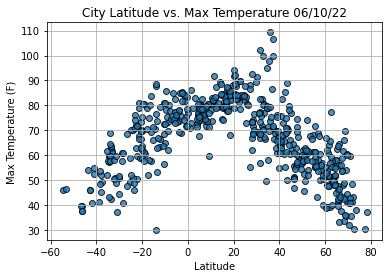

In [21]:
#Import time module.

import time

#Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
                                                               
plt.ylabel("Max Temperature (F)")
                                                               
plt.xlabel("Latitude")
                                                               
plt.grid(True)

#Save the figure
                                                               
plt.savefig("weather_data/Fig1.png")
                                                               
#show plot
                                                               
plt.show()
                                                                                                            

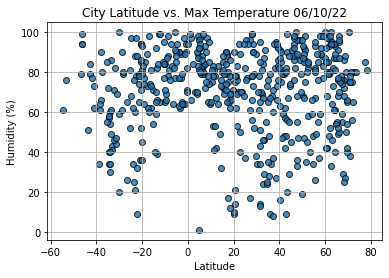

In [22]:
#Build the scatter plot for latitude vs. humidity.

plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
                                                               
plt.ylabel("Humidity (%)")
                                                               
plt.xlabel("Latitude")
                                                               
plt.grid(True)

#Save the figure
                                                               
plt.savefig("weather_data/Fig2.png")
                                                               
#show plot
                                                               
plt.show()

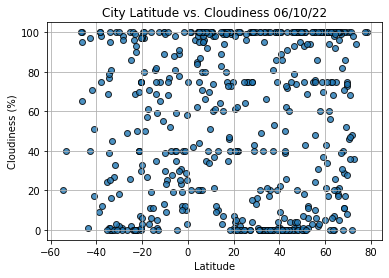

In [23]:
#Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats, cloudiness , edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
                                                               
plt.ylabel("Cloudiness (%)")
                                                               
plt.xlabel("Latitude")
                                                               
plt.grid(True)

#Save the figure
                                                               
plt.savefig("weather_data/Fig3.png")
                                                               
#show plot
                                                               
plt.show()

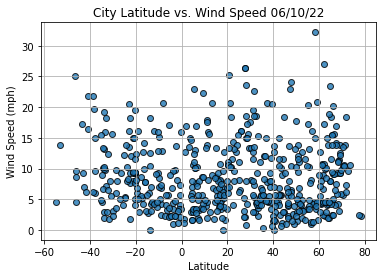

In [24]:
#Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
                                                               
plt.ylabel("Wind Speed (mph)")
                                                               
plt.xlabel("Latitude")
                                                               
plt.grid(True)

#Save the figure
                                                               
plt.savefig("weather_data/Fig4.png")
                                                               
#show plot
                                                               
plt.show()

In [56]:
#Import lineregress

from scipy.stats import linregress

#Create a function to create perform linear regressiom on the weather data and plot a regression line
#and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    rvalue=r_value
   
    #Get the equation of the line.
    
    line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #Create a scatter plot and plot the regression liner.
    
    plt.scatter(x_values, y_values)
    
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel("Latitude")
    
    plt.ylabel(y_label)
    
    print(f"R value:{rvalue}")
    
    plt.show()

In [31]:
#Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]

southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]


R value:-0.7777359670583203


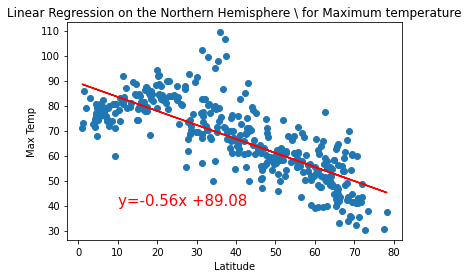

In [57]:
#Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

#Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for Maximum temperature", 
                      "Max Temp", (10,40))



R value:0.7546297898474708


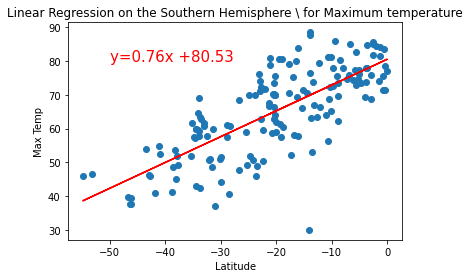

In [58]:
#Linear regression on the Southern Hemisphere.

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

#Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \ for Maximum temperature", 
                      "Max Temp", (-50,80))

R value:-0.03238694665040686


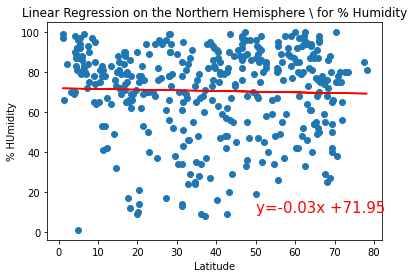

In [59]:
#Linear regression for the Northern Hemisphere on humidity

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

#Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for % Humidity", 
                      "% HUmidity", (50,10))

R value:0.29014860679393856


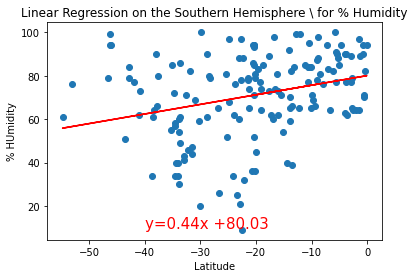

In [60]:
#Linear regression on the Southern Hemisphere for Humidity

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

#Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \ for % Humidity", 
                      "% HUmidity", (-40,10))


R value:-0.06355489579785994


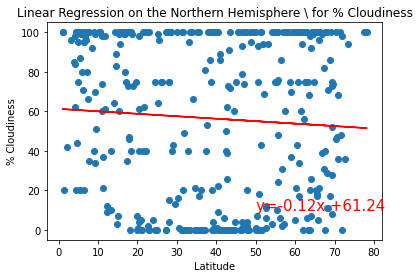

In [61]:
#Linear regression on the Northern Hemisphere for Cloudiness

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

#Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for % Cloudiness", 
                      "% Cloudiness", (50,10))

R value:-0.02448034374991581


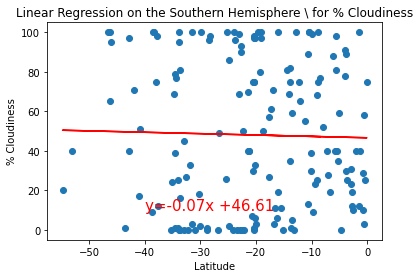

In [62]:
x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

#Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \ for % Cloudiness", 
                      "% Cloudiness", (-40,10))

R value:0.010335149055149569


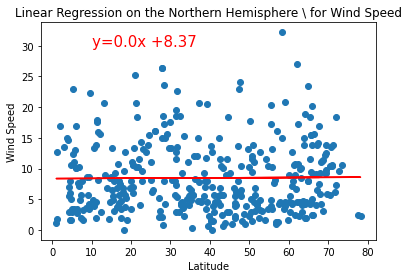

In [67]:
x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

#Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for Wind Speed", 
                      "Wind Speed", (10,30))

R value:-0.3048702176441874


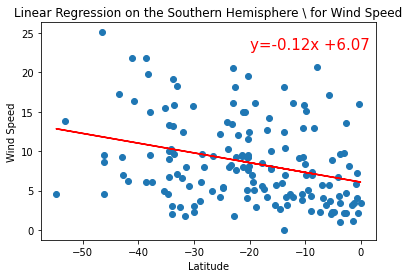

In [66]:
x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

#Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \ for Wind Speed", 
                      "Wind Speed", (-20,23))